In [2]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [4]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [7]:
#folder shortcut
path = r'/Users/brooks/Downloads/6/6.1/World Happiness Data/02 Data/Prepared Data'


In [9]:
df_hap = pd.read_csv(os.path.join(path,'Happiness_data_final.csv'), index_col = False)

In [11]:
df_hap.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Lower Confidence Interval,Upper Confidence Interval,Standard error of Happiness score
0,152,Afghanistan,Southern Asia,153,3.575,0.030840,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015,3.288000,3.432000,0.031311
1,469,Afghanistan,Southern Asia,154,3.360,0.032983,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016,3.288000,3.432000,0.031311
2,608,Afghanistan,Southern Asia,141,3.794,0.035127,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017,3.714338,3.873661,0.031311
3,761,Afghanistan,Southern Asia,145,3.632,0.037270,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018,3.311402,3.458531,0.031311
4,919,Afghanistan,Southern Asia,154,3.203,0.039413,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019,2.908466,3.043401,0.031311


In [21]:
df_hap=df_hap

In [23]:
df_hap

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Lower Confidence Interval,Upper Confidence Interval,Standard error of Happiness score
0,Afghanistan,Southern Asia,153,3.5750,0.030840,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015,3.288000,3.432000,0.031311
1,Afghanistan,Southern Asia,154,3.3600,0.032983,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016,3.288000,3.432000,0.031311
2,Afghanistan,Southern Asia,141,3.7940,0.035127,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017,3.714338,3.873661,0.031311
3,Afghanistan,Southern Asia,145,3.6320,0.037270,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018,3.311402,3.458531,0.031311
4,Afghanistan,Southern Asia,154,3.2030,0.039413,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019,2.908466,3.043401,0.031311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Zimbabwe,Sub-Saharan Africa,146,3.6630,0.042900,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000,2019,3.379899,3.602368,0.063721
1466,Zimbabwe,Sub-Saharan Africa,151,3.2992,0.042900,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064,2020,3.184198,3.414202,0.058674
1467,Zimbabwe,Sub-Saharan Africa,148,3.1450,0.042900,7.943000,0.750000,56.201000,0.677000,0.821000,-0.047000,2021,3.030000,3.259000,0.058000
1468,Zimbabwe,Sub-Saharan Africa,144,2.9950,0.042900,7.792000,0.720000,55.125500,0.665500,0.793500,-0.046500,2022,2.880000,3.110000,0.059500


In [29]:
# Check the column names 

df_hap.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Social Support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year', 'Standard error of Happiness score'],
      dtype='object')

In [34]:
# Create a subset which contains only the 'Happiness_Score' and indicators

sub = df_hap[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

# 02. The elbow technique

In [36]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [38]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brooks/an

[-1474101.0925978892,
 -26392.72088483233,
 -8875.218697444847,
 -5409.91912221098,
 -4020.3903910506374,
 -3099.0643147148485,
 -2530.695636913795,
 -2109.2335218887,
 -1859.2038070977255]

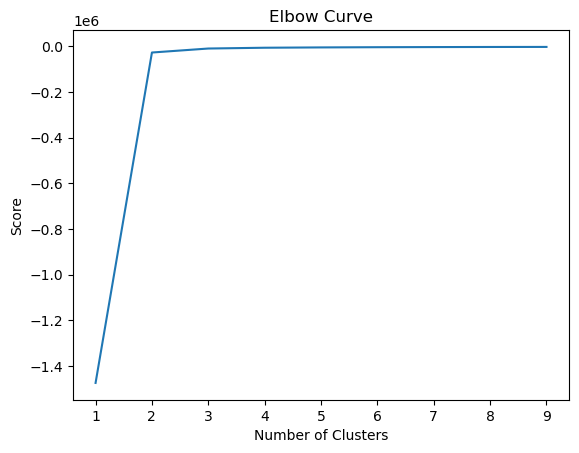

In [40]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [42]:
#The elbow (the breaking point of the curve) is exactly where the curve begins to flatten. In this scenario, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. My thoughts will be that the optimal number of clusters is three.



# 03. k-means clustering

In [46]:
#create the k-means object
kmeans = KMeans(n_clusters = 3)

In [50]:
kmeans.fit(sub)

/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [52]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

/Users/brooks/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/_0/1vzyz01d69s9hqf6yl5yyyk40000gn/T/ipykernel_85612/1587882893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [54]:
sub.head()

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,3.575,0.319820,0.303350,0.23414,0.097190,0.365100,0
1,3.360,0.382270,0.173440,0.16430,0.071120,0.312680,0
2,3.794,0.401477,0.180747,0.10618,0.061158,0.311871,0
3,3.632,0.332000,0.255000,0.08500,0.036000,0.191000,0
4,3.203,0.350000,0.361000,0.00000,0.025000,0.158000,0


In [56]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

0    920
1    372
2    178
Name: clusters, dtype: int64

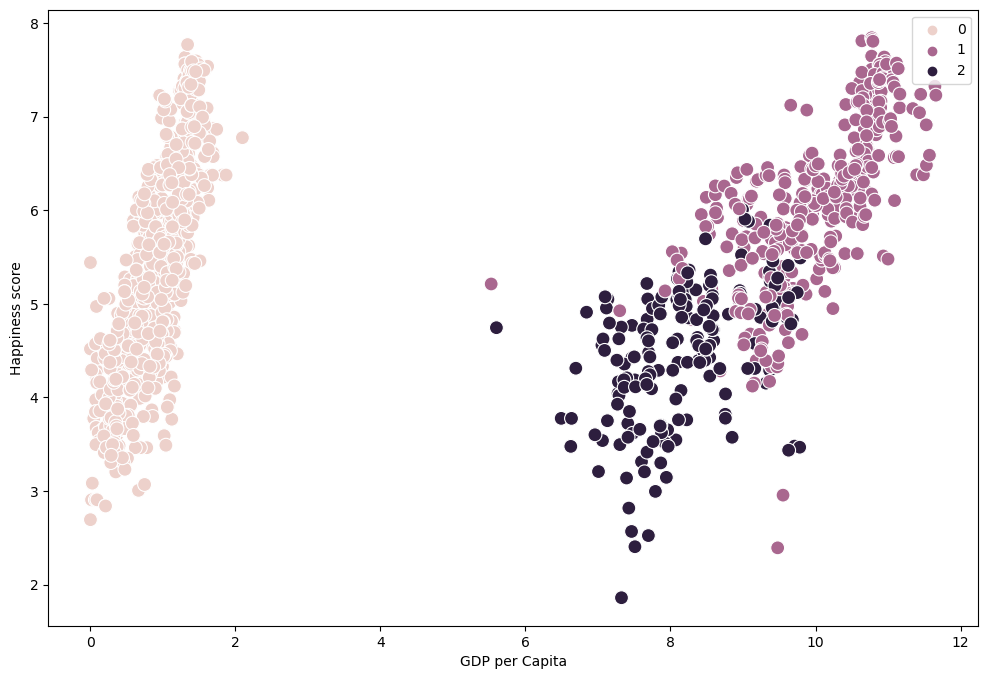

In [60]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Economy (GDP per Capita)'], y = sub['Happiness Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness score')
plt.show()

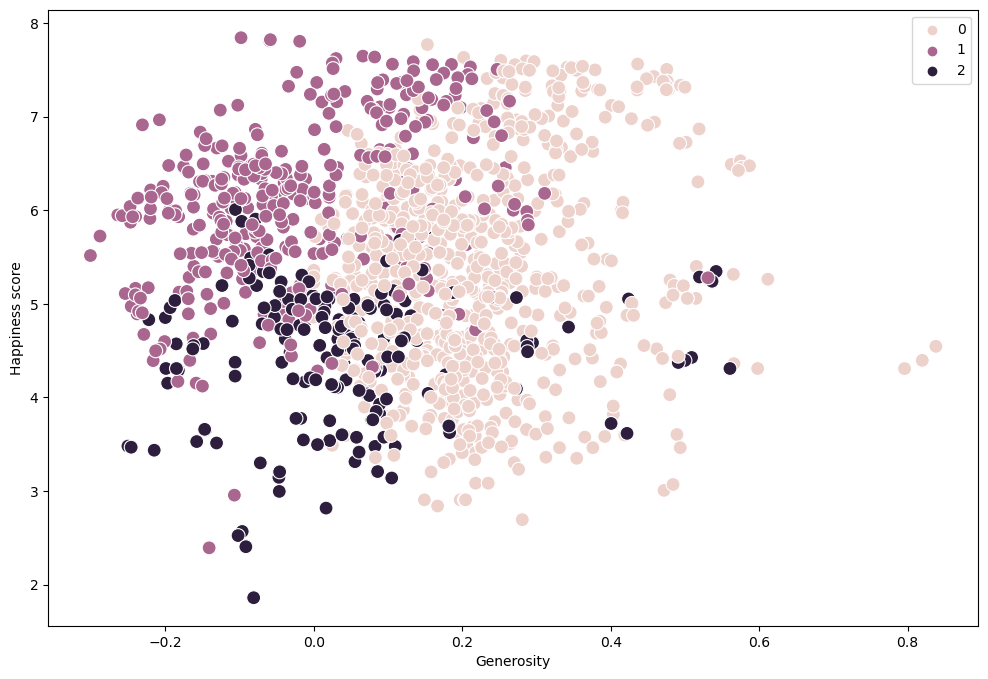

In [63]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Generosity'], y = sub['Happiness Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Generosity')
plt.ylabel('Happiness score')
plt.show()

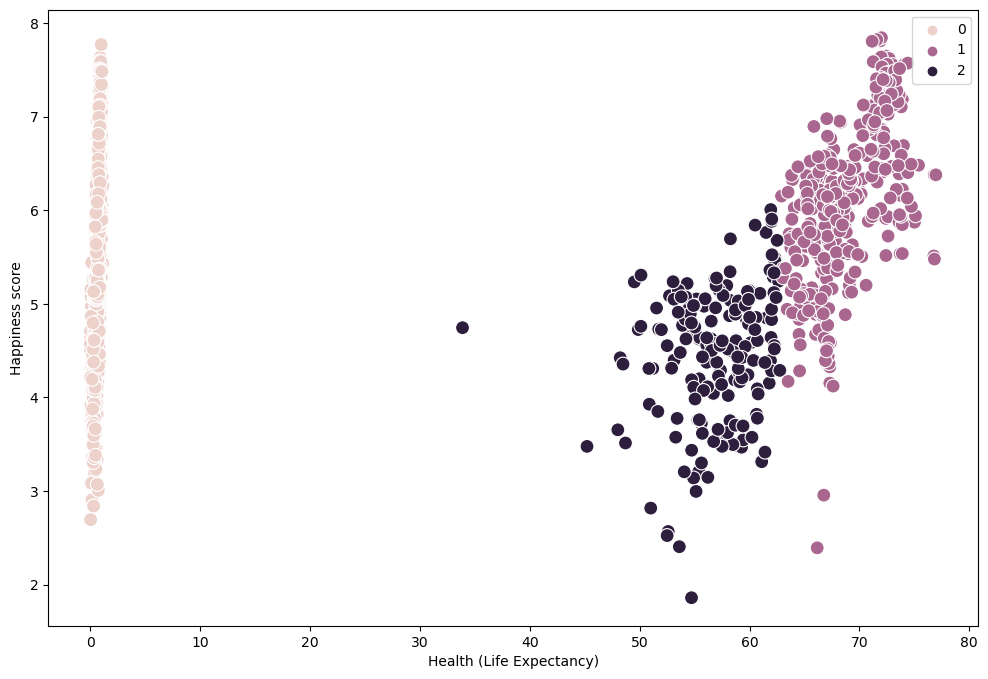

In [68]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Health (Life Expectancy)'], y = sub['Happiness Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness score')
plt.show()

# Conclusions
The findings suggest that the purple cluster generally has the highest levels of GDP per capita,health, Generosity and happiness scores, followed by the pink cluster,while the dark cluster tends to have lower levels on these indicators. These clusters represent different levels of economic development and well-being, with the purple cluster being the most prosperous and happy, and the dark cluster being the least.

In [70]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [72]:
sub.groupby('cluster').agg({'Economy (GDP per Capita)':['mean', 'median'], 
                         'Generosity':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median'],
                          'Happiness Score':['mean', 'median']})

Economy (GDP per Capita)            Generosity            \
                            mean     median       mean    median   
cluster                                                            
dark                    8.178959   8.117500   0.043201  0.032188   
pink                    0.907610   0.974380   0.221887  0.205360   
purple                 10.001452  10.110792  -0.022825 -0.043750   

        Health (Life Expectancy)            Happiness Score          
                            mean     median            mean  median  
cluster                                                              
dark                   56.915056  57.182494        4.462244  4.5645  
pink                    0.618172   0.660075        5.387497  5.3175  
purple                 68.729306  68.017500        6.070764  6.1130

# Conclusions
Based on the statitcs analysed above, it shows that the Pink Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. The Purple Cluster shows a slight larger difference, indicating slightly more variability within those clusters for some indicators. The Dark Cluster is the most diverse and inconsistent.



# The inconsistency within the clusters can be used for detection that the actual result under a given set of assumptions is different from the expected result predicted by a model. If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual scenarios that require further investigation. This can prompt additional analysis and new hypotheses. The findings can help better understand the characteristics of each cluster. Within the realm of social or public policy, understanding cluster's differences can inform targeted investitions, interventions, or support efforts. In the context of business and marketing, organizations can use these results to make critical decisions concerning expanding the company, product development, and resource allocations. These clusters can help to monitor changes over time. This can enable us to compare whether countries or regions within each cluster improves or deteriorates in key areas such as health, family support, economic conditions, or overall happiness of people.

Above all, the results of cluster analysis can be used  for a wide range of applications and decision-making processes in various domains, such as business, marketing, public policy, healthcare.

In [77]:
# Export the dataframe to csv file

df_hap.to_csv(os.path.join(path, 'Happiness_data_final.csv'))
sub.to_csv(os.path.join(path,'clusters.csv'))